In [2]:
#import necessary libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import Dataset

In [7]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df=df[['BloodPressure','Age','Outcome']]
df

,BloodPressure,Age,Outcome
0,72,50,1
1,66,31,0
2,64,32,1
3,66,21,0
4,40,33,1
...,...,...,...
763,76,63,0
764,70,27,0
765,72,30,0
766,60,47,1


# DataPreparation

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

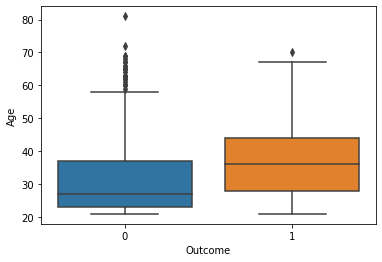

In [9]:
sns.boxplot(data=df,x='Outcome', y='Age')

In [10]:
drop_index=df[(df['Outcome']<1)
            & (df['Age']>35)
            ].index
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

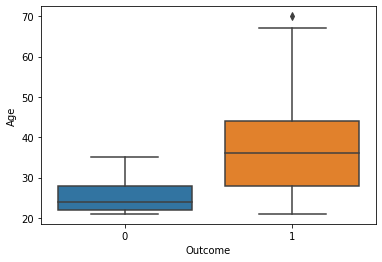

In [11]:
sns.boxplot(data=df,x='Outcome', y='Age')

In [13]:
drop_index=df[(df['Outcome']>0)
            & (df['Age']>68)
            ].index
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

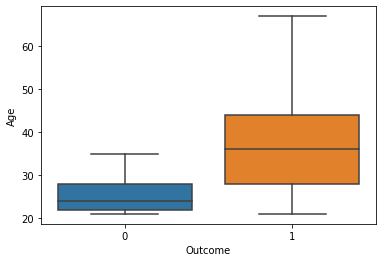

In [14]:
sns.boxplot(data=df,x='Outcome', y='Age')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

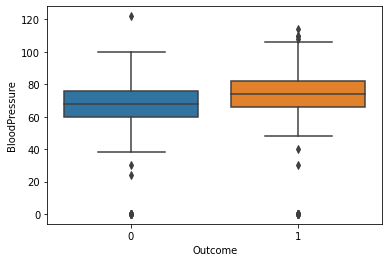

In [15]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [16]:
drop_index=df[(df['Outcome']<1)
            & (df['BloodPressure']>99)].index
            
drop_index
df=df.drop(drop_index, axis=0)

In [17]:
drop_index=df[(df['Outcome']<1)
            & (df['BloodPressure']<40)].index
            
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

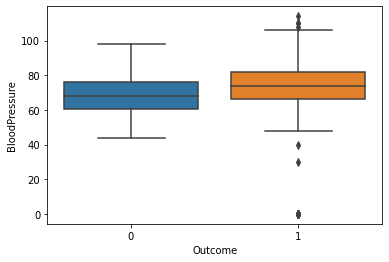

In [18]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [19]:
drop_index=df[(df['Outcome']>0)
            & (df['BloodPressure']>100)].index
            
drop_index
df=df.drop(drop_index, axis=0)

In [20]:
drop_index=df[(df['Outcome']>0)
            & (df['BloodPressure']<50)].index
            
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

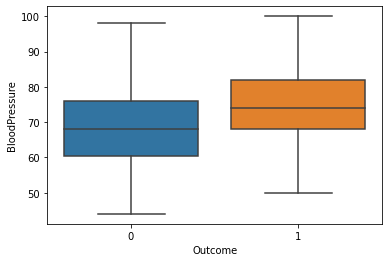

In [21]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [22]:
df.isnull().sum()

BloodPressure    0
Age              0
Outcome          0
dtype: int64

# EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  586 non-null    int64
 1   Age            586 non-null    int64
 2   Outcome        586 non-null    int64
dtypes: int64(3)
memory usage: 18.3 KB


In [25]:
df.describe()

,BloodPressure,Age,Outcome
count,586.000000,586.000000,586.000000
mean,71.187713,30.122867,0.409556
std,11.056912,9.615439,0.492172
min,44.000000,21.000000,0.000000
25%,64.000000,23.000000,0.000000
50%,70.000000,27.000000,0.000000
75%,80.000000,33.750000,1.000000
max,100.000000,67.000000,1.000000


In [26]:
df['Outcome'].value_counts()

0    346
1    240
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

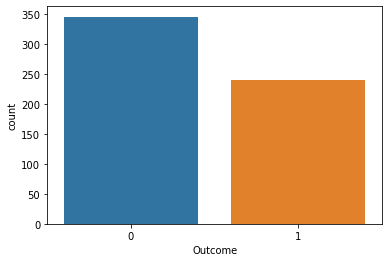

In [27]:
sns.countplot(data=df,x='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

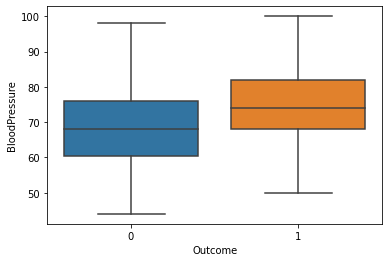

In [28]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

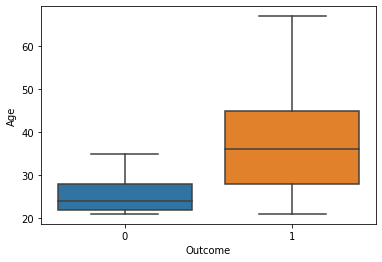

In [29]:
sns.boxplot(data=df,x='Outcome', y='Age')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

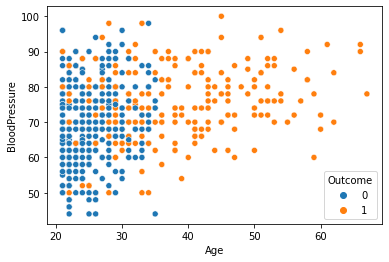

In [30]:
sns.scatterplot(data=df, x='Age', y='BloodPressure',hue='Outcome')

# Feature/Label

In [31]:
X=df.drop('Outcome',axis=1)
y=df[['Outcome']]

# Train/Test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scalling the Features

In [33]:
scaler=StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler()

In [35]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Train the Model

In [37]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [38]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predicting Test data

In [39]:
y_pred=knn_model.predict(scaled_X_test)

# Evaluationg Model Performance

In [40]:
metrics.accuracy_score(y_test,y_pred)

0.6610169491525424

In [41]:
metrics.confusion_matrix(y_test,y_pred)

array([[25, 12],
       [ 8, 14]], dtype=int64)

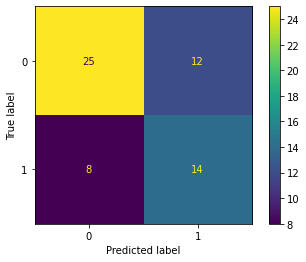

In [43]:
metrics.plot_confusion_matrix(knn_model, scaled_X_test, y_test)

In [44]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71        37
           1       0.54      0.64      0.58        22

    accuracy                           0.66        59
   macro avg       0.65      0.66      0.65        59
weighted avg       0.68      0.66      0.67        59



# Choosing the optimum value for K

# 1:Elbow Method

In [45]:
test_error_rate=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test=knn_model.predict(scaled_X_test)
    
    test_error=1-metrics.accuracy_score(y_test,y_pred_test)
    test_error_rate.append(test_error)

In [46]:
test_error_rate

[0.3389830508474576,
 0.2033898305084746,
 0.2542372881355932,
 0.18644067796610164,
 0.18644067796610164,
 0.1694915254237288,
 0.1694915254237288,
 0.22033898305084743,
 0.2033898305084746,
 0.2033898305084746,
 0.18644067796610164,
 0.18644067796610164,
 0.1694915254237288,
 0.15254237288135597,
 0.1694915254237288,
 0.15254237288135597,
 0.1694915254237288,
 0.15254237288135597,
 0.1694915254237288,
 0.15254237288135597,
 0.15254237288135597,
 0.1694915254237288,
 0.18644067796610164,
 0.1694915254237288,
 0.18644067796610164,
 0.1694915254237288,
 0.1694915254237288,
 0.1694915254237288,
 0.15254237288135597]

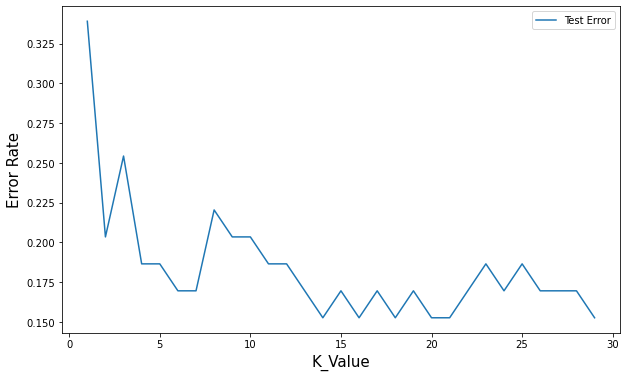

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rate,label='Test Error')
plt.xlabel('K_Value',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
plt.legend()

In [64]:
knn_model=KNeighborsClassifier(n_neighbors=18)

In [65]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [66]:
y_pred=knn_model.predict(scaled_X_test)

In [67]:
metrics.accuracy_score(y_test,y_pred)

0.847457627118644

In [68]:
metrics.confusion_matrix(y_test,y_pred)

array([[37,  0],
       [ 9, 13]], dtype=int64)

# 2:Grid Search

In [69]:
scaler=StandardScaler()

In [70]:
knn=KNeighborsClassifier()

In [71]:
operations=[('scaler', scaler),('knn',knn)]

In [72]:
pipe=Pipeline(operations)

In [73]:
k_values=list(range(1,20))

In [74]:
param_grid={'knn__n_neighbors':k_values}

In [75]:
full_cv_classifier=GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [76]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [77]:
full_cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])>

In [78]:
knn_model=KNeighborsClassifier(n_neighbors=7)

In [79]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
y_pred=knn_model.predict(scaled_X_test)

In [81]:
metrics.accuracy_score(y_test,y_pred)

0.8305084745762712

In [82]:
metrics.confusion_matrix(y_test,y_pred)

array([[35,  2],
       [ 8, 14]], dtype=int64)